<h1 style="text-align: center; vertical-align: middle;">Numerical Methods in Accelerator Physics</h1>
<h2 style="text-align: center; vertical-align: middle;">Python examples -- Week 7</h2>

<h2>Run this first!</h2>

Imports and modules:

In [1]:
from config7 import (np, plt)
from scipy.constants import m_p, e, c
%matplotlib inline

<h2>Betatron Matrices</h2>

In [2]:
def M_drift(L):
    return np.array([
        [1, L],
        [0, 1]
    ])

def M_dip_x(L, rho0):
    return np.array([
        [np.cos(L / rho0), rho0 * np.sin(L / rho0)],
        [-1 / rho0 * np.sin(L / rho0), np.cos(L / rho0)]
    ])

def M_dip_y(L, rho0):
    return M_drift(L)

def M_quad_x(L, k):
    ksq = np.sqrt(k + 0j)
    return np.array([
        [np.cos(ksq * L), 1 / ksq * np.sin(ksq * L)],
        [-ksq * np.sin(ksq * L), np.cos(ksq * L)]
    ]).real

def M_quad_y(L, k):
    ksq = np.sqrt(k + 0j)
    return np.array([
        [np.cosh(ksq * L), 1 / ksq * np.sinh(ksq * L)],
        [ksq * np.sinh(ksq * L), np.cosh(ksq * L)]
    ]).real

In [3]:
def track(M, u, up):
    '''Apply M to each individual [u;up] vectors value.'''
    return np.einsum('ij,...j->i...', M, np.vstack((u, up)).T)

<h2>Thin Sextupole Kick</h2>

In [4]:
def track_sext_4D(x, xp, y, yp, mL):
    xp += 0.5 * mL * (y * y - x * x)
    yp += mL * x * y
    return x, xp, y, yp

<h2>Simulation Examples</h2>

<h3>1. Simulating a drift:</h3>

In [5]:
np.random.seed(12345)

In [6]:
N = 100
sig_x = 5e-3
sig_xp = 2e-3

x = np.random.normal(0, sig_x, N)
xp = np.random.normal(0, sig_xp, N)

In [7]:
ds = 0.01

D = M_drift(ds)

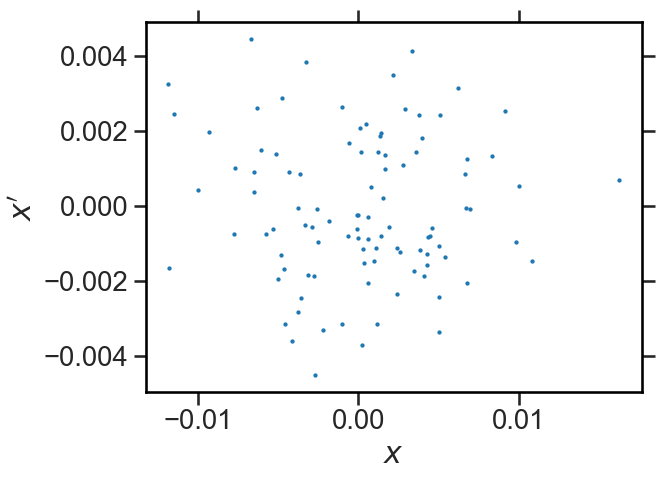

In [8]:
plt.scatter(x, xp, c='C0', s=10, marker='.')
plt.xlabel('$x$')
plt.ylabel("$x'$");

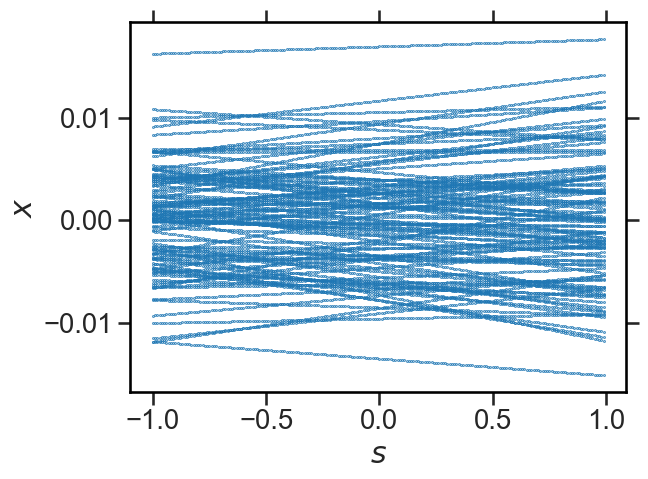

In [9]:
for s in np.arange(-1, 1, ds):
    x, xp = track(D, x, xp)
    plt.scatter(np.ones(N) * s, x, c='C0', s=1, marker='.')
plt.xlabel('$s$')
plt.ylabel('$x$');

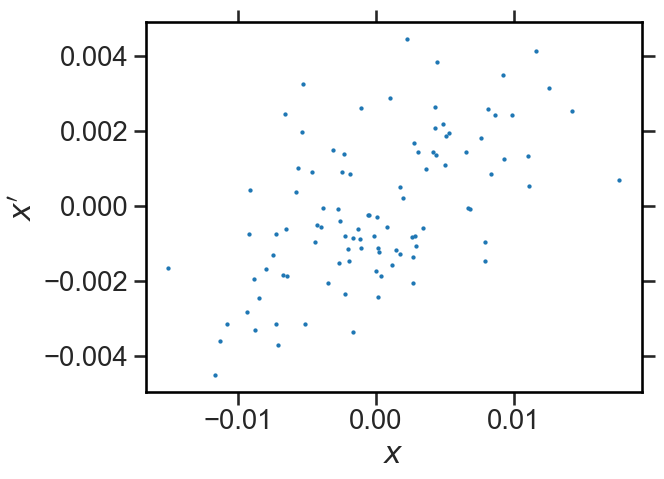

In [10]:
plt.scatter(x, xp, c='C0', s=10, marker='.')
plt.xlabel('$x$')
plt.ylabel("$x'$");

Same simulation again with correlated $x$, $x'$:

In [11]:
np.random.seed(12345)

In [12]:
N = 100
sig_x = 5e-3
sig_xp = 2e-3

x = np.random.normal(0, sig_x, N)
xp = np.random.normal(0, sig_xp / 2, N) - x * sig_x / sig_xp * 0.4

In [13]:
ds = 0.01

D = M_drift(ds)

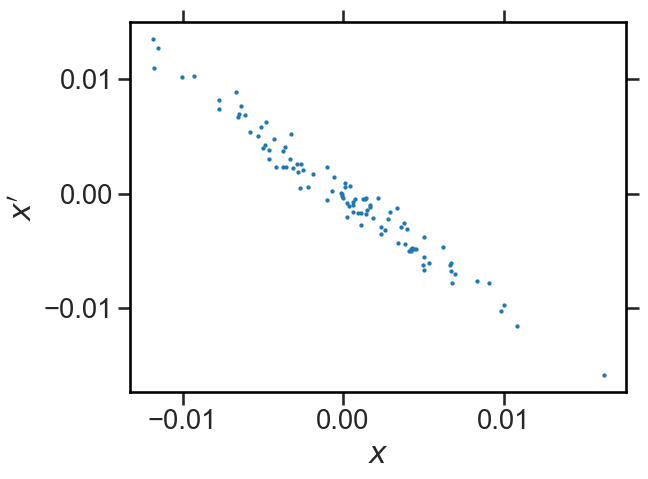

In [14]:
plt.scatter(x, xp, c='C0', s=10, marker='.')
plt.xlabel('$x$')
plt.ylabel("$x'$");

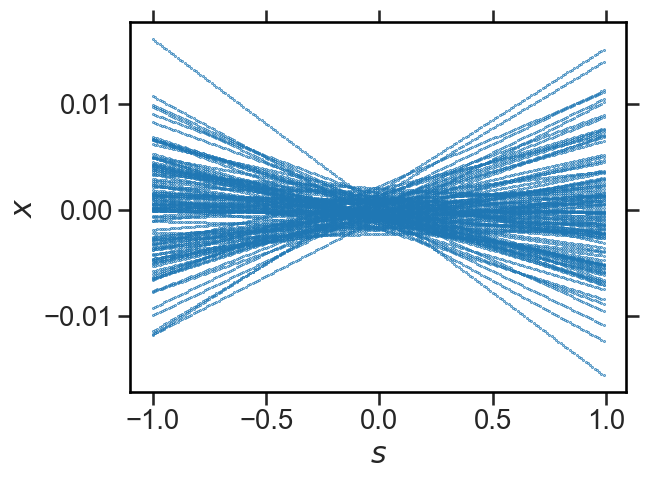

In [15]:
for s in np.arange(-1, 1, ds):
    x, xp = track(D, x, xp)
    plt.scatter(np.ones(N) * s, x, c='C0', s=1, marker='.')
plt.xlabel('$s$')
plt.ylabel('$x$');

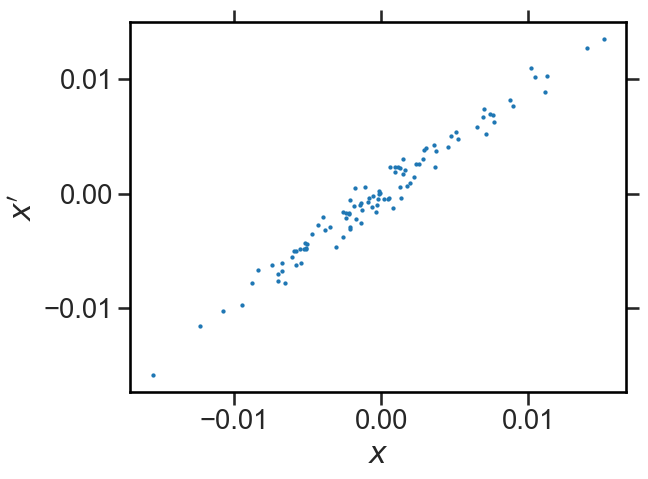

In [16]:
plt.scatter(x, xp, c='C0', s=10, marker='.')
plt.xlabel('$x$')
plt.ylabel("$x'$");

$\implies$ particles move (drift) for- and backward along $x$ depending on their momentum (angle) $x'$!

<h3>Simulating a quadrupole in focusing plane:</h3>

In [17]:
np.random.seed(12345)

In [18]:
N = 100
sig_x = 5e-3
sig_xp = 2e-3

x = np.random.normal(0, sig_x, N)
xp = np.random.normal(0, sig_xp, N)

In [19]:
ds = 0.01

Qx = M_quad_x(ds, 10)

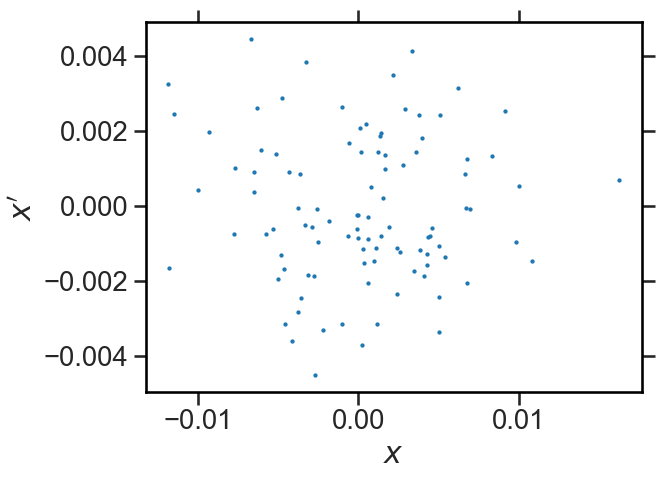

In [20]:
plt.scatter(x, xp, c='C0', s=10, marker='.')
plt.xlabel('$x$')
plt.ylabel("$x'$");

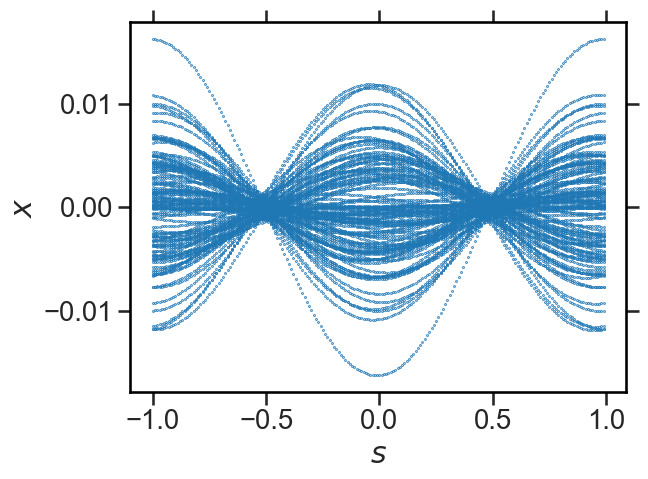

In [21]:
for s in np.arange(-1, 1, ds):
    x, xp = track(Qx, x, xp)
    plt.scatter(np.ones(N) * s, x, c='C0', s=1, marker='.')
plt.xlabel('$s$')
plt.ylabel('$x$');

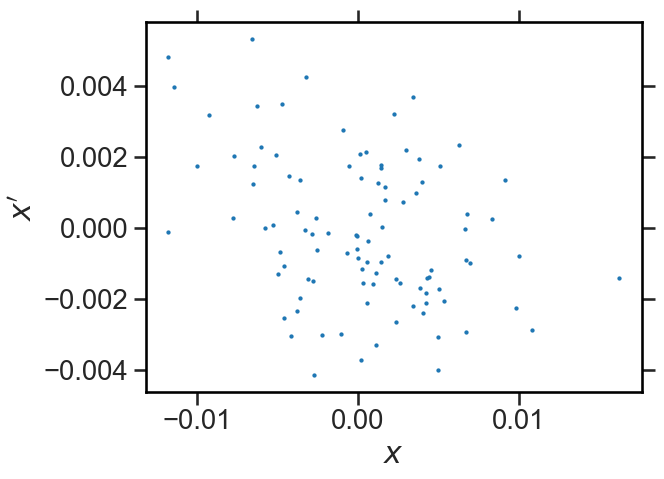

In [22]:
plt.scatter(x, xp, c='C0', s=10, marker='.')
plt.xlabel('$x$')
plt.ylabel("$x'$");

<h3>Simulating a quadrupole in defocusing plane:</h3>

In [23]:
np.random.seed(12345)

In [24]:
N = 100
sig_x = 5e-3
sig_xp = 2e-3

x = np.random.normal(0, sig_x, N)
xp = np.random.normal(0, sig_xp, N)

Note the negative sign for the $k$ to obtain defocusing in the horizontal plane:

In [25]:
ds = 0.01

Qx = M_quad_x(ds, -10)

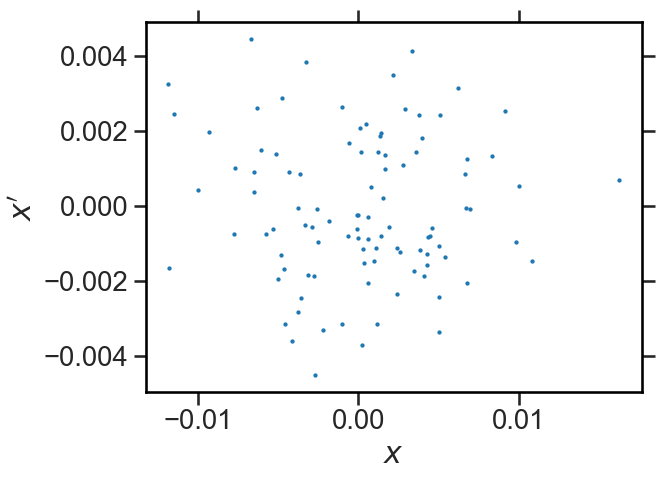

In [26]:
plt.scatter(x, xp, c='C0', s=10, marker='.')
plt.xlabel('$x$')
plt.ylabel("$x'$");

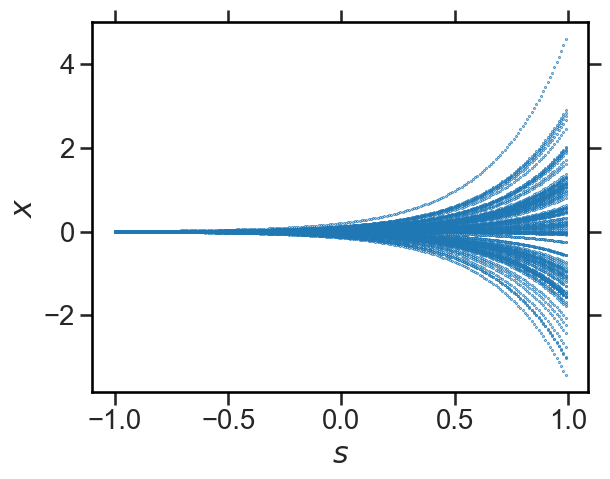

In [27]:
for s in np.arange(-1, 1, ds):
    x, xp = track(Qx, x, xp)
    plt.scatter(np.ones(N) * s, x, c='C0', s=1, marker='.')
plt.xlabel('$s$')
plt.ylabel('$x$');

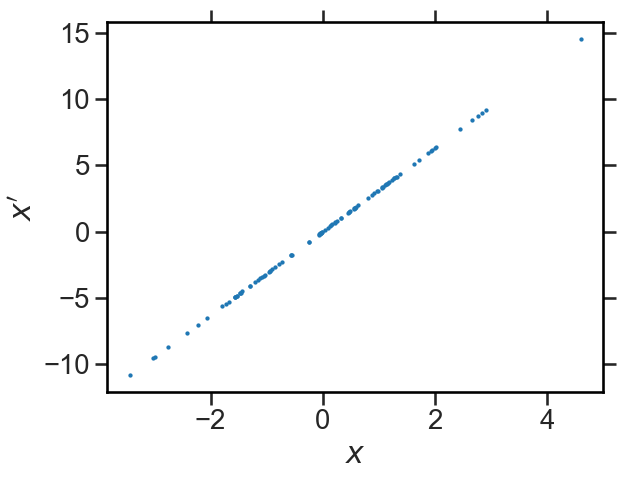

In [28]:
plt.scatter(x, xp, c='C0', s=10, marker='.')
plt.xlabel('$x$')
plt.ylabel("$x'$");

$\implies$ the problem of constant continous quadrupole fields lies in that one plane focuses while the other plane defocuses!

<h3>4. Simulating a FODO cell:</h3>

In [29]:
np.random.seed(12345)

In [30]:
N = 100
sig_x = 5e-3
sig_xp = 3e-4

x = np.random.normal(0, sig_x, N)
xp = np.random.normal(0, sig_xp, N)

In [31]:
ds = 0.1
k = 0.2

D = M_drift(ds)
Qfx = M_quad_x(ds, k)
Qdx = M_quad_x(ds, -k)

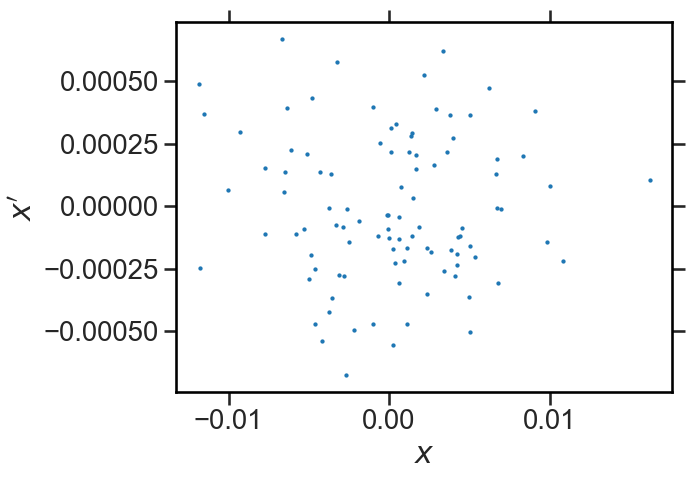

In [32]:
plt.scatter(x, xp, c='C0', s=10, marker='.')
plt.xlabel('$x$')
plt.ylabel("$x'$");

We assume a total FODO cell length of 10m and a length of each quadrupole magnet of 1m.
Tracking the FODO cell in the horizontal plane, starting from the center of the focusing quadrupole (=horizontally focusing!):

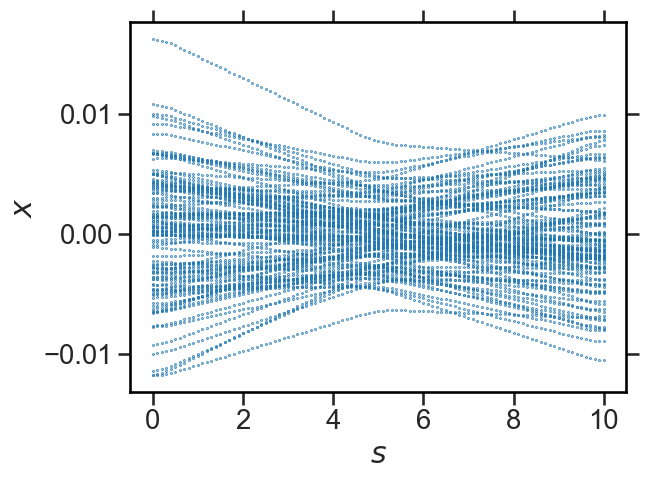

In [33]:
# 1/2 focusing quad
for s in np.arange(0, 0.5001, ds):
    x, xp = track(Qfx, x, xp)
    plt.scatter(np.ones(N) * s, x, c='C0', s=1, marker='.')
# drift
for s in np.arange(0.5, 4.5001, ds)[1:]:
    x, xp = track(D, x, xp)
    plt.scatter(np.ones(N) * s, x, c='C0', s=1, marker='.')
# defocusing quad
for s in np.arange(4.5, 5.5001, ds)[1:]:
    x, xp = track(Qdx, x, xp)
    plt.scatter(np.ones(N) * s, x, c='C0', s=1, marker='.')
# drift
for s in np.arange(5.5, 9.5001, ds)[1:]:
    x, xp = track(D, x, xp)
    plt.scatter(np.ones(N) * s, x, c='C0', s=1, marker='.')
# 1/2 focusing quad
for s in np.arange(9.5, 10.0001, ds)[1:]:
    x, xp = track(Qfx, x, xp)
    plt.scatter(np.ones(N) * s, x, c='C0', s=1, marker='.')
plt.xlabel('$s$')
plt.ylabel('$x$');

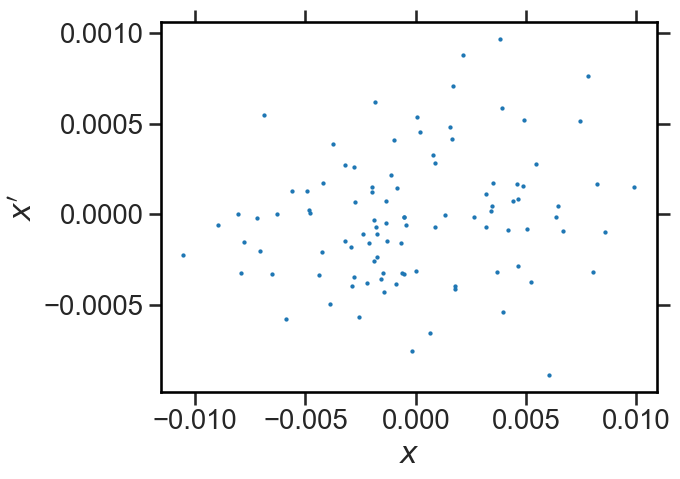

In [34]:
plt.scatter(x, xp, c='C0', s=10, marker='.')
plt.xlabel('$x$')
plt.ylabel("$x'$");

What about the vertical plane now? The quadrupoles have their function inverted, a horizontally focusing quadrupole defocuses in the vertical plane, so the same lattice looks like "D-O-F-O" with respect to the vertical plane:

In [35]:
sig_y = 5e-3
sig_yp = 3e-4

y = np.random.normal(0, sig_y, N)
yp = np.random.normal(0, sig_yp, N)

In [36]:
Qfy = M_quad_y(ds, k)
Qdy = M_quad_y(ds, -k)

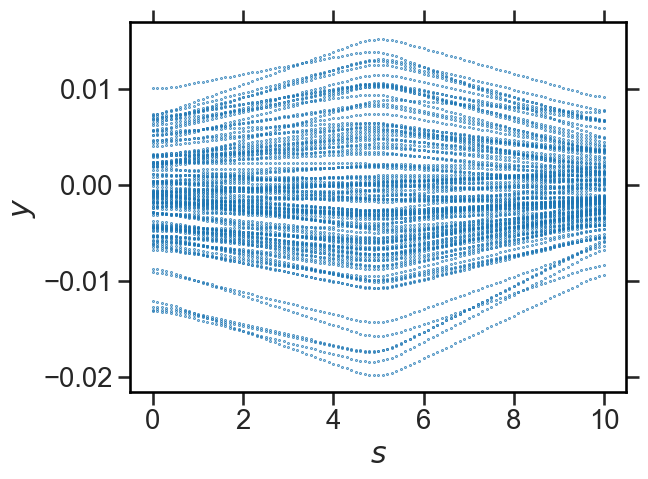

In [37]:
# 1/2 vertically defocusing quad (horizontally focusing, so "Qf")
for s in np.arange(0, 0.5001, ds):
    y, yp = track(Qfy, y, yp)
    plt.scatter(np.ones(N) * s, y, c='C0', s=1, marker='.')
# drift
for s in np.arange(0.5, 4.5001, ds)[1:]:
    y, yp = track(D, y, yp)
    plt.scatter(np.ones(N) * s, y, c='C0', s=1, marker='.')
# defocusing quad (horizontally defocusing, so "Qd")
for s in np.arange(4.5, 5.5001, ds)[1:]:
    y, yp = track(Qdy, y, yp)
    plt.scatter(np.ones(N) * s, y, c='C0', s=1, marker='.')
# drift
for s in np.arange(5.5, 9.5001, ds)[1:]:
    y, yp = track(D, y, yp)
    plt.scatter(np.ones(N) * s, y, c='C0', s=1, marker='.')
# 1/2 focusing quad
for s in np.arange(9.5, 10.0001, ds)[1:]:
    y, yp = track(Qfy, y, yp)
    plt.scatter(np.ones(N) * s, y, c='C0', s=1, marker='.')
plt.xlabel('$s$')
plt.ylabel('$y$');

$\implies$ can ensure quasi-harmonic motion in both (!) transverse planes! Transverse confinement of beam by alternating-gradient (AG) focusing! This is the principle behind synchrotrons!

How does this look like over long time scales? Let us build the one-cell matrix and track for many cells:

In [38]:
M_cell = M_quad_x(0.5, k) # 1/2 focusing quad
M_cell = M_cell.dot(M_drift(4)) # drift
M_cell = M_cell.dot(M_quad_x(1, -k)) # defocusing quad
M_cell = M_cell.dot(M_drift(4)) # drift
M_cell = M_cell.dot(M_quad_x(0.5, k)) # 1/2 focusing quad

In [39]:
n_cells = 100

In [40]:
np.random.seed(12345)

In [41]:
N = 100
sig_x = 5e-3
sig_xp = 3e-4

x = np.random.normal(0, sig_x, N)
y = np.random.normal(0, sig_xp, N)

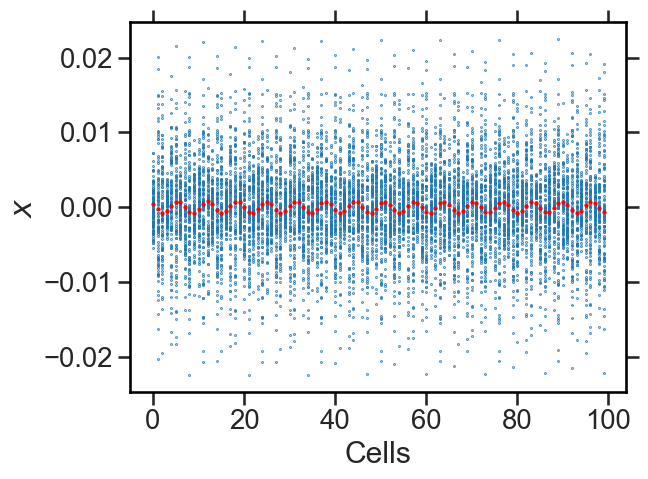

In [42]:
for i in range(n_cells):
    x, xp = track(M_cell, x, xp)

    plt.scatter(np.ones(N) * i, x, c='C0', s=1, marker='.')
    plt.scatter([i], [x[-1]], c='r', s=10, marker='.')
plt.xlabel('Cells')
plt.ylabel('$x$');

$\implies$ we observe regular motion, amplitudes remain bound! It looks like the magnet configuration is stable and the beam is well confined!

What about the phase-space trajectories at this position in the lattice (a so-called Poincaré section)?

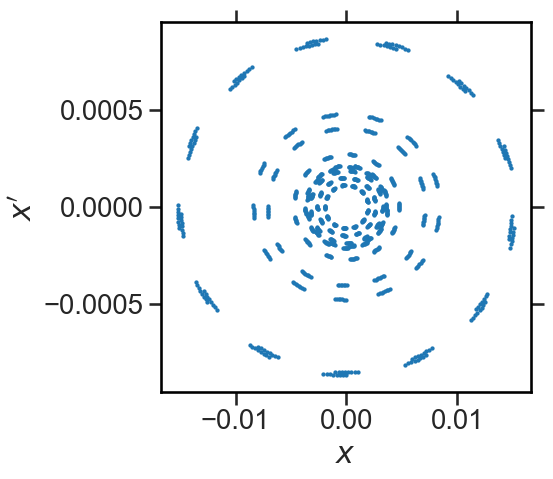

In [43]:
for i in range(n_cells):
    x, xp = track(M_cell, x, xp)
    plt.scatter(x[::10], xp[::10], c='C0', s=10, marker='.')
plt.xlabel('$x$')
plt.ylabel("$x'$")
plt.gca().set_aspect(np.diff(plt.xlim()) / np.diff(plt.ylim()));

$\implies$ the circles indicate linear bound motion!

<h3>5. Simulating a FODO cell with increasingly strong $k$:</h3>

In [44]:
k = 0.431

In [45]:
M_cell = M_quad_x(0.5, k) # 1/2 focusing quad
M_cell = M_cell.dot(M_drift(4)) # drift
M_cell = M_cell.dot(M_quad_x(1, -k)) # defocusing quad
M_cell = M_cell.dot(M_drift(4)) # drift
M_cell = M_cell.dot(M_quad_x(0.5, k)) # 1/2 focusing quad

In [46]:
n_cells = 100

In [47]:
N = 100
sig_x = 5e-3
sig_xp = 3e-4

x = np.random.normal(0, sig_x, N)
xp = np.random.normal(0, sig_xp, N)

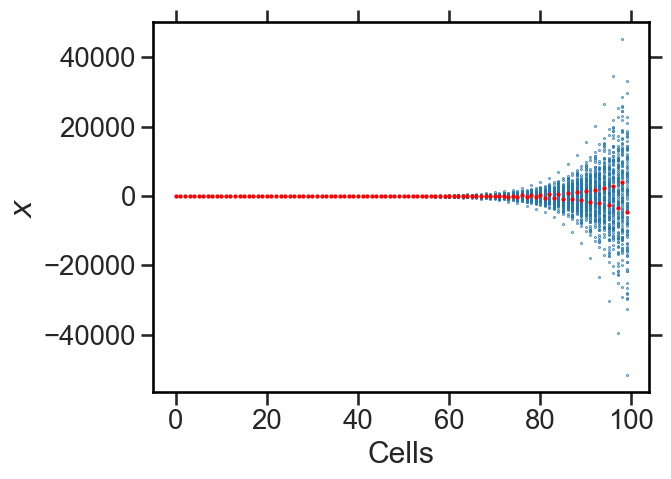

In [48]:
for i in range(n_cells):
    x, xp = track(M_cell, x, xp)
    plt.scatter(np.ones(N) * i, x, c='C0', s=1, marker='.')
    plt.scatter([i], [x[-1]], c='r', s=10, marker='.')
plt.xlabel('Cells')
plt.ylabel('$x$');

$\implies$ motion becomes unstable! Is the one-cell matrix a "valid" (symplectic) betatron matrix?

In [49]:
np.linalg.det(M_cell)

0.9999999999999999

$\implies$ the matrix obeys $\det(\mathcal{M})=1$ and is thus symplectic. But what about the eigenvalues?

Solve the characteristic polynomial of the one-cell matrix, $\det(\mathcal{M}-\lambda\mathbb{1})=0$ for $\lambda$:

In [50]:
np.linalg.eigvals(M_cell)

array([-0.87523826, -1.14254604])

$\implies$ we find one $|\lambda|>1$! If one absolute eigenvalue becomes larger than unity, the magnet configuration becomes unstable! That explains the instability (exponential divergence) here! Equivalently one finds $|\mathrm{Tr}(\mathcal{M})|>2$:

In [51]:
np.trace(M_cell)

-2.0177842920349742

What happens to a single particle in phase space in the Poincaré section?

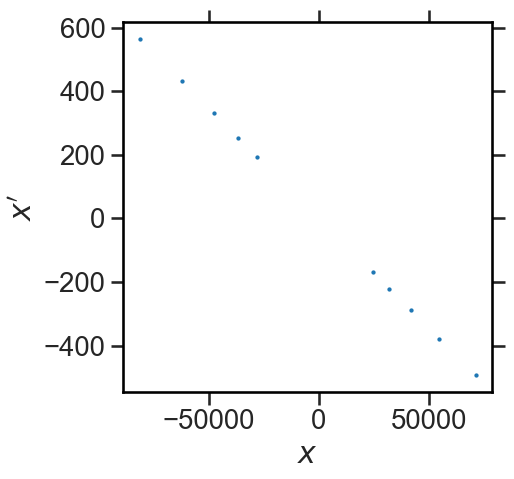

In [52]:
for i in range(10):
    x, xp = track(M_cell, x, xp)
    plt.scatter(x[0], xp[0], c='C0', s=10, marker='.')
plt.xlabel('$x$')
plt.ylabel("$x'$")
plt.gca().set_aspect(np.diff(plt.xlim()) / np.diff(plt.ylim()));

<h3>6. Simulating a FODO cell with a sextupole:</h3>

We go back to the stable FODO cell configuration and add a thin sextupole magnet after 1/4 of the lattice, between the first focusing and the second defocusing quadrupole!

The sextupole kick provides a non-linearity in the potential that confines the particles. At large enough amplitude, the non-linear term dominates the particles are no longer bound / confined!

We need to track in 4D phase-space (full transverse plane with both x and y), as the sextupole provides coupling terms:

In [53]:
np.random.seed(12345)

We need a first matrix 1/4 of the cell until the sextupole, one for the $x$ (`M_cell_x_1`) and another one for the $y$ plane (`M_cell_y_1`). Then a second matrix each to track $x$ and $y$ for the remaining 3/4 of the cell (`M_cell_x_2`, `M_cell_y_2`):

In [54]:
k = 0.2
mL = 1.8

# horizontal plane:
M_cell_x_1 = M_quad_x(0.5, k) # 1/2 focusing quad
M_cell_x_1 = M_cell_x_1.dot(M_drift(2)) # drift
## here sits the sextupole
M_cell_x_2 = M_drift(2) # drift
M_cell_x_2 = M_cell_x_2.dot(M_quad_x(1, -k)) # defocusing quad
M_cell_x_2 = M_cell_x_2.dot(M_drift(4)) # drift
M_cell_x_2 = M_cell_x_2.dot(M_quad_x(0.5, k)) # 1/2 focusing quad

# vertical plane:
M_cell_y_1 = M_quad_y(0.5, k) # 1/2 focusing quad
M_cell_y_1 = M_cell_y_1.dot(M_drift(2)) # drift
## here sits the sextupole
M_cell_y_2 = M_drift(2) # drift
M_cell_y_2 = M_cell_y_2.dot(M_quad_y(1, -k)) # defocusing quad
M_cell_y_2 = M_cell_y_2.dot(M_drift(4)) # drift
M_cell_y_2 = M_cell_y_2.dot(M_quad_y(0.5, k)) # 1/2 focusing quad

In [55]:
n_cells = 1000

Initialize the tranverse particle distribution:

In [56]:
N = 100
sig_x = 5e-3
sig_xp = 3e-4
sig_y = 5e-3
sig_yp = 3e-4

x = np.random.normal(0, sig_x, N)
xp = np.random.normal(0, sig_xp, N)
y = np.random.normal(0, sig_y, N)
yp = np.random.normal(0, sig_yp, N)

Let us record the horizontal phase-space coordinates during the tracking:

In [57]:
rec_x = np.zeros((n_cells, N), dtype=x.dtype)
rec_xp = np.zeros_like(rec_x)

Let us set the last particle to the same phase-space coordinates as the first particle up to a very small epsilon, for later:

In [58]:
x[-1] = x[0]
xp[-1] = xp[0]
y[-1] = y[0]
yp[-1] = yp[0] * 1.001

Let's go, the full 4D tracking loop comes here:

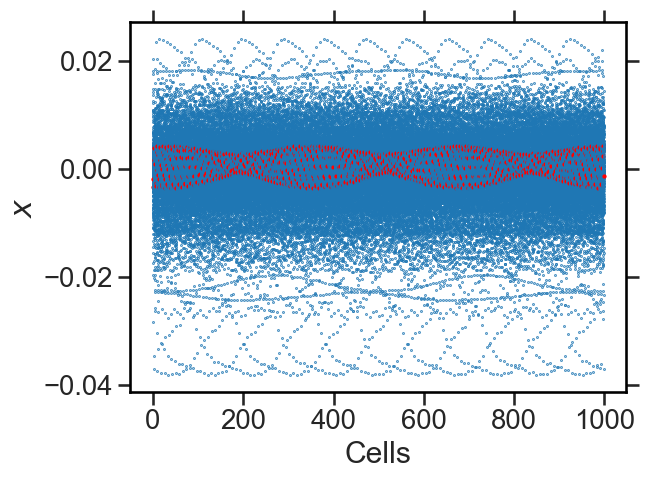

In [59]:
for i in range(n_cells):
    # initial 1/4 of the cell
    x, xp = track(M_cell_x_1, x, xp)
    y, yp = track(M_cell_y_1, y, yp)
    # sextupole
    x, xp, y, yp = track_sext_4D(x, xp, y, yp, mL)
    # remaining 3/4 of the cell
    x, xp = track(M_cell_x_2, x, xp)
    y, yp = track(M_cell_y_2, y, yp)
    
    plt.scatter(np.ones(N) * i, x, c='C0', s=1, marker='.')
    plt.scatter([i], [x[-1]], c='r', s=10, marker='.')
    
    rec_x[i] = x
    rec_xp[i] = xp
plt.xlabel('Cells')
plt.ylabel('$x$');

How does the horizontal phase-space (Poincaré map) look like?

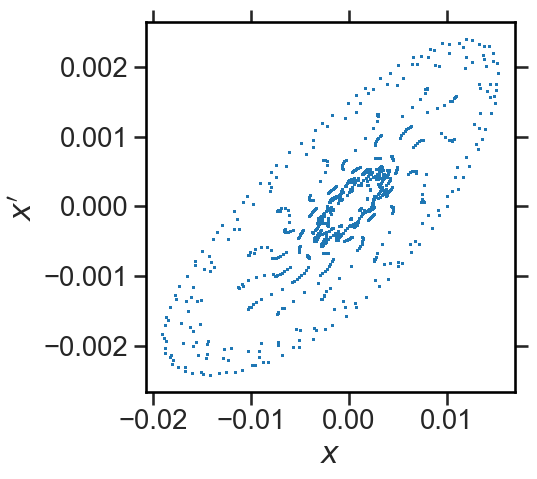

In [60]:
for i in range(n_cells):
    plt.scatter(rec_x[:100,::10], rec_xp[:100,::10], c='C0', s=1, marker='.')
plt.xlabel('$x$')
plt.ylabel("$x'$")
plt.gca().set_aspect(np.diff(plt.xlim()) / np.diff(plt.ylim()));

$\implies$ single particles do not maintain the same (linear) ampitude (radius in $x-x'$) during the tracking!

A single particle looks like this:

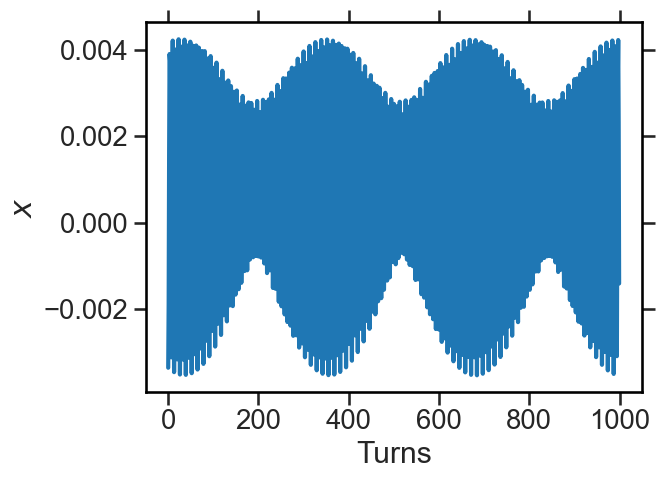

In [61]:
plt.plot(rec_x[:, 0])
plt.xlabel('Turns')
plt.ylabel('$x$');

$\implies$ distorted regular motion (see the asymmetry between positive and negative $x$ values in the oscillation), the particle is still bound but the sextupole deforms the phase-space topology from the regular circles we observed for purely linear tracking.

Remember, the last particle was just a copy from the first particle with a slightly increased $y'$ value. Let us investigate the difference in their horizontal position during the tracking:

Text(0, 0.5, '$|\\Delta x|$')

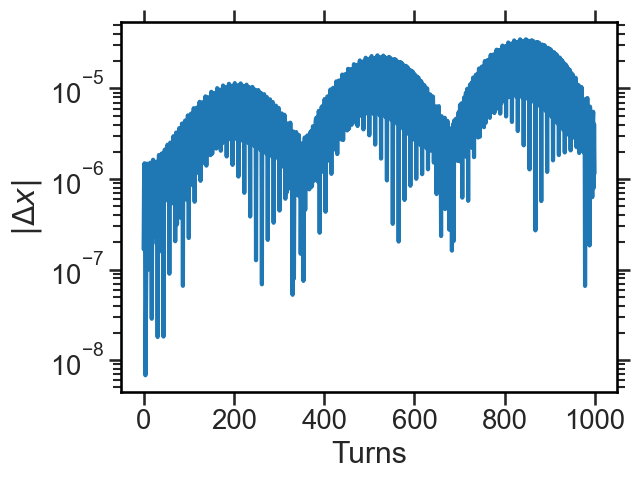

In [62]:
plt.plot(np.abs(rec_x[:,0] - rec_x[:,-1]))
plt.yscale('log')
plt.xlabel('Turns')
plt.ylabel(r'$|\Delta x|$')

$\implies$ for finite sextupole strength, we observe on average an exponential increase. This points to a finite positive maximum Lyapunov exponent, which is an early indicator of deterministic chaos.

All in all, the thin sextupole magnet in the lattice
- provides a non-linearity in the potential which the particles see
- distorts the regular motion in phase-space
- leads to a change of the (linear) amplitude in phase space
- provides deterministic chaos, in particular at larger amplitudes (positive Lyapunov exponent!)

$\implies$ repeat this exercise with a zero sextupole strength $m=0$ to confirm these insights for yourself!

Hint: in order to observe a meaningful result in the last plot, add a factor `* 1.001` to `xp` for the last particle to see an effect. Due to the absent coupling between $x$ and $y$, there will be no difference in the $x$ motion of both particles without the sextupole!